## Model
After EDA some insights were obtained. Now, to build a multiple linear regression model to generalize the population there are some conditions that must be verified before.

**Linear Regression Conditions**
* Linearity
* Homoscedasticity
* Multivariate normality
* Independence of errors
* Lack of multicollinearity

For **Linearity**, during the exploratory data analysis we found features such as *Item_MRP* that has a 0.5 to 0.6 linear correlation with the response variable. In fact, what a linear regression model assumes is linearity in the parameters that transforms the independent features in the dataset. One can say that linearity is not a problem for this case.

**Homoscedasticity** refers to the situation where all training examples have the same error term, this assumption is used to train the model, as all training examples are treated with equal importance. To test this, scatter plots and some statistical test can be applied once the model has been trained.

**Multivariate normality** means independet variables to be normal. During the exploratory data analysis phase we did not see any distribution plot that could alarm us or make us hesitate about the normality of the characteristics.

**Independence of errors** dictate that the errors between predicted and real values must not show any pattern (autocorrelation).

Finally, **Lack of multicollinearity** refers to when the independent variables are highly correlated with each other. Since the other conditions are done or need to have the model ready to test it, a correlation table will be constructed between the features before building the model itself.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('train_clean.csv')

corr = df.corr()
corr.style.background_gradient().set_precision(2)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1,-0.027,-0.0092,0.026,-0.013,0.013
Item_Fat_Content,-0.027,1,0.047,0.0064,0.0038,0.019
Item_Visibility,-0.0092,0.047,1,-0.0012,-0.074,-0.13
Item_MRP,0.026,0.0064,-0.0012,1,0.0046,0.57
Outlet_Establishment_Year,-0.013,0.0038,-0.074,0.0046,1,-0.049
Item_Outlet_Sales,0.013,0.019,-0.13,0.57,-0.049,1


The correlation matrix doesn't show any multicollinearity. The model can be constructed without problems.

First, some features must be transformed since they are categorical.

### *Item_Type* transformation
Using one hot encoding the type of the product will be transformed into a numeric feature, each type of product is equally important so the encoding can't be treated as ordinal.

In [2]:
import EDA_framework as EDA
transformed = EDA.transform_dummy(df,'Item_Type',drop_first=True)
df = df.drop('Item_Type', axis='columns')
df = pd.concat([df, transformed], axis='columns')
df.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,0,0.016047,249.8092,1999,Small,Tier 1,Supermarket Type1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.019278,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,141.6180,1999,Small,Tier 1,Supermarket Type1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200,1,0.000000,182.0950,1998,Small,Tier 3,Grocery Store,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,53.8614,1987,Small,Tier 3,Supermarket Type1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0
5,10.395,1,0.000000,51.4008,2009,Medium,Tier 3,Supermarket Type2,556.6088,0,...,0,0,0,0,0,0,0,0,0,0
6,13.650,1,0.012741,57.6588,1987,Small,Tier 3,Supermarket Type1,343.5528,0,...,0,0,0,0,0,0,0,1,0,0
7,19.000,0,0.127470,107.7622,1985,Medium,Tier 3,Supermarket Type3,4022.7636,0,...,0,0,0,0,0,0,0,1,0,0
8,16.200,1,0.016687,96.9726,2002,Small,Tier 2,Supermarket Type1,1076.5986,0,...,0,0,0,0,0,0,0,0,0,0
9,19.200,1,0.094450,187.8214,2007,Small,Tier 2,Supermarket Type1,4710.5350,0,...,0,0,0,0,0,0,0,0,0,0


Here, the *drop_first* feature is to avoid include collinearity to the dataset.

### *Outlet_Size* transformation
The outlet sizes in the dataset are *Small* and *Medium*, this suggest to transform the size into an ordinal feature where 0 means a small shop and 1 a medium one.

In [3]:
encode = {'Outlet_Size' : {'Small': 0, 'Medium' : 1}}
df.replace(encode, inplace=True)
df.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,...,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.300,0,0.016047,249.8092,1999,0,Tier 1,Supermarket Type1,3735.1380,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.019278,48.2692,2009,1,Tier 3,Supermarket Type2,443.4228,0,...,0,0,0,0,0,0,0,0,1,0
2,17.500,0,0.016760,141.6180,1999,0,Tier 1,Supermarket Type1,2097.2700,0,...,0,0,0,0,1,0,0,0,0,0
3,19.200,1,0.000000,182.0950,1998,0,Tier 3,Grocery Store,732.3800,0,...,1,0,0,0,0,0,0,0,0,0
4,8.930,0,0.000000,53.8614,1987,0,Tier 3,Supermarket Type1,994.7052,0,...,0,0,0,1,0,0,0,0,0,0
5,10.395,1,0.000000,51.4008,2009,1,Tier 3,Supermarket Type2,556.6088,0,...,0,0,0,0,0,0,0,0,0,0
6,13.650,1,0.012741,57.6588,1987,0,Tier 3,Supermarket Type1,343.5528,0,...,0,0,0,0,0,0,0,1,0,0
7,19.000,0,0.127470,107.7622,1985,1,Tier 3,Supermarket Type3,4022.7636,0,...,0,0,0,0,0,0,0,1,0,0
8,16.200,1,0.016687,96.9726,2002,0,Tier 2,Supermarket Type1,1076.5986,0,...,0,0,0,0,0,0,0,0,0,0
9,19.200,1,0.094450,187.8214,2007,0,Tier 2,Supermarket Type1,4710.5350,0,...,0,0,0,0,0,0,0,0,0,0


### *Outlet_Location_Type* transformation
The outlet location types are *Tier 1*, *Tier 2* and *Tier 3*. The differences are not clear enough to make the feature ordinal.

In [4]:
transformed = EDA.transform_dummy(df,'Outlet_Location_Type',drop_first=True)
df = df.drop('Outlet_Location_Type', axis='columns')
df = pd.concat([df, transformed], axis='columns')
df.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Type,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,...,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3
0,9.300,0,0.016047,249.8092,1999,0,Supermarket Type1,3735.1380,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.920,1,0.019278,48.2692,2009,1,Supermarket Type2,443.4228,0,0,...,0,0,0,0,0,0,1,0,0,1
2,17.500,0,0.016760,141.6180,1999,0,Supermarket Type1,2097.2700,0,0,...,0,0,1,0,0,0,0,0,0,0
3,19.200,1,0.000000,182.0950,1998,0,Grocery Store,732.3800,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8.930,0,0.000000,53.8614,1987,0,Supermarket Type1,994.7052,0,0,...,0,1,0,0,0,0,0,0,0,1
5,10.395,1,0.000000,51.4008,2009,1,Supermarket Type2,556.6088,0,0,...,0,0,0,0,0,0,0,0,0,1
6,13.650,1,0.012741,57.6588,1987,0,Supermarket Type1,343.5528,0,0,...,0,0,0,0,0,1,0,0,0,1
7,19.000,0,0.127470,107.7622,1985,1,Supermarket Type3,4022.7636,0,0,...,0,0,0,0,0,1,0,0,0,1
8,16.200,1,0.016687,96.9726,2002,0,Supermarket Type1,1076.5986,0,0,...,0,0,0,0,0,0,0,0,1,0
9,19.200,1,0.094450,187.8214,2007,0,Supermarket Type1,4710.5350,0,0,...,0,0,0,0,0,0,0,0,1,0


Again, one row is omited to avoid collinearity.

### *Outlet_Type* transformation
Finally, the outlet type is transformed using one hot encoder because the exploratory data analysis suggested that each type is different.

In [5]:
transformed = EDA.transform_dummy(df,'Outlet_Type',drop_first=True)
df = df.drop('Outlet_Type', axis='columns')
df = pd.concat([df, transformed], axis='columns')
df.head(10)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,...,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0,0.016047,249.8092,1999,0,3735.1380,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.920,1,0.019278,48.2692,2009,1,443.4228,0,0,0,...,0,0,0,1,0,0,1,0,1,0
2,17.500,0,0.016760,141.6180,1999,0,2097.2700,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,19.200,1,0.000000,182.0950,1998,0,732.3800,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.930,0,0.000000,53.8614,1987,0,994.7052,0,0,0,...,0,0,0,0,0,0,1,1,0,0
5,10.395,1,0.000000,51.4008,2009,1,556.6088,0,0,0,...,0,0,0,0,0,0,1,0,1,0
6,13.650,1,0.012741,57.6588,1987,0,343.5528,0,0,0,...,0,0,1,0,0,0,1,1,0,0
7,19.000,0,0.127470,107.7622,1985,1,4022.7636,0,0,0,...,0,0,1,0,0,0,1,0,0,1
8,16.200,1,0.016687,96.9726,2002,0,1076.5986,0,0,0,...,0,0,0,0,0,1,0,1,0,0
9,19.200,1,0.094450,187.8214,2007,0,4710.5350,0,0,0,...,0,0,0,0,0,1,0,1,0,0


## Feature Selection: Backward Elimination
Basically, the model to generalize the products will be a muliple linear regression model. Every feature will have a parameter theta fited with ordinary least square. Backward elimination is the process of training the model, find the feature with the highest p-value and then fit the model with this variable, this process is repeated until all p-values are less than a custom significance level (in this case 0.05).

In [6]:
y = df['Item_Outlet_Sales'].values
X = df.drop(['Item_Outlet_Sales'], axis='columns').values
print('X_train and y_train are ready.')

X_train and y_train are ready.


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)
print('Split done.')

Split done.


#### Sequential Feature Selector
Using *mlxtend* library, the implementation of backward elimination is presented below.

In [8]:
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

lr = LinearRegression(fit_intercept=False)
sfs = SFS(lr, 
          k_features=10, 
          forward=False, 
          floating=False, 
          scoring='r2',
          verbose=2,
          cv=5)

sfs = sfs.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    1.9s finished

[2019-01-16 12:51:30] Features: 25/10 -- score: 0.5583294277551623[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.6s finished

[2019-01-16 12:51:32] Features: 24/10 -- score: 0.5585731277743706[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    1.7s finished

[2019-01-16 12:51:34] Features: 23/10 -- score: 0.5589925946468421[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [9]:
X_train = sfs.transform(X_train)
X_test = sfs.transform(X_test)

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt

mae = mean_absolute_error(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: {0}\nMAE: {1}'.format(rmse, mae))

RMSE: 1149.8287334567465
MAE: 845.2329831063898


### Model Interpretation
The R<sup>2</sup> of the final model is 0.56 which is a little bit low. The idea of this project is to understand the behaviour of the products so I decided to keep the model for easy interpretation.

In [10]:
features = list(df.columns[list(sfs.k_feature_idx_)])
coefficients = list(lr.coef_)

features.append('INTERCEPT')
coefficients.append(lr.intercept_)

model_df = pd.DataFrame()
model_df['Feature Name'] = features
model_df['Coefficient'] = coefficients
model_df
# for feature, coef in zip(feature_names, lr.coef_): print('{1} * {0}'.format(feature, coef))

,Feature Name,Coefficient
0,Item_Fat_Content,57.297754
1,Item_MRP,15.480297
2,Outlet_Establishment_Year,-0.921573
3,Item_Type_Canned,-92.750167
4,Item_Type_Dairy,-51.827656
5,Item_Type_Health and Hygiene,-46.657235
6,Item_Type_Starchy Foods,33.653456
7,Outlet_Location_Type_Tier 3,1948.506590
8,Outlet_Type_Supermarket Type1,1649.925600
9,Outlet_Type_Supermarket Type2,3367.018807


Each feature has an interpretation, the intercept of 0 means that to predict the number of sales of a new product, the model assumes 0 sales as a base.

#### Fat Content Interpretation
From the exploratory data analysis phase, the feature was encoded to be 1 if the product is regular fat, and 0 if not. The coefficient here is approximately 57.30 and means that for a product, be regular fat tends to increase its final number of sales in 57. However, it is important to remember that the statistical difference was insignificant int he one-way ANOVA test results.

#### Item MRP Interpretation
Here the coefficient was 15.5 and means that basically, for each $1 increase in the MRP there is an increase of 15 sales in the prediction. Recalling from the exploratory data analysis, we saw the same positive relationship, and in fact the plots showed that the relationship can be stronger depending on the type of product.

#### Outlet Establishment Year Interpretation
In the phase of exploratory data analysis we saw that this feature is not very important to determine the final number of sales of a product. The coefficient of -0.92 says that (as the EDA showed) if the store is older, shoppers may have a very small preference, but it is not as significant.

#### Canned, Dairy, Health and Hygiene and Starchy food Interpretation
This type of products are the ones that influence the most in the final quantity of sales. Starchy food is the only type that has a positive impact in the number of sales with 33 sales, the other type of products actually decrease the prediction for the sales.

#### Tier 3 Location Type Interpretation
This is the feature with a very high coefficient. The value of 1948.5 means that type 3 locations are very product demanding and could mean tier 3 are places with very large populations.

#### Supermarket Type 1 and 2 Interpretation
The coefficient of this two features are high but only one will apply at the moment to make a prediction. For a new product, 3367 increase in sales are expected if is selled in a type 2 supermarket, 1649 if is selled in a type 1 supermarket, and if the product is selled in a type 3 supermarket or in a grocery store, then the place is not really a crucial influence in sales.

### Checking Linear Regression Conditions
Now the model is ready and we can test the conditions using the error when predicting the train data.
#### Checking Homoscedasticity

In [18]:
from scipy.stats import bartlett
predictions = lr.predict(X_train)

errors = y_train - predictions
X1, X2 = train_test_split(errors, test_size=0.5)

test_result = bartlett(X1, X2)
print('T statistic: {0}\nP-Value: {1}'.format(test_result[0], test_result[1]))

T statistic: 3.1337977803451373
P-Value: 0.07668490521773957


The p-value of 0.077 (> 0.05) support the hypothesis in favour of the homoscedasticiy of erros.

#### Checking Independence of errors

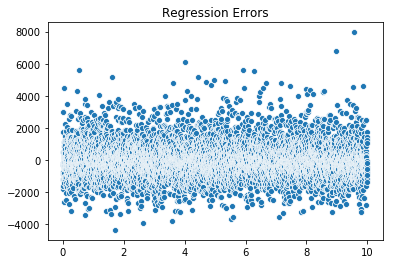

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.scatterplot(x=np.linspace(0, 10, len(errors)), y=errors, ax=ax)
ax.set(title='Regression Errors')
plt.show()

The errors don't have any tendendency so we can assure their independence.

## Conclusions
To finish this project the conclsions are that it was possible to build a linear regression model to explain the 10 principal factors that influence the number of sales of a product with an r<sup>2</sup> of 0.56 and a mean average error of 845 sales.